# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
height_sample = get_sample(athletes,'height',3000)

In [8]:
def q1():
    stats, p_value = sct.shapiro(height_sample)
    print(p_value)
    return bool(p_value >= 0.005)

In [9]:
q1()

5.681722541339695e-07


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

Text(0.5, 0, 'Height')

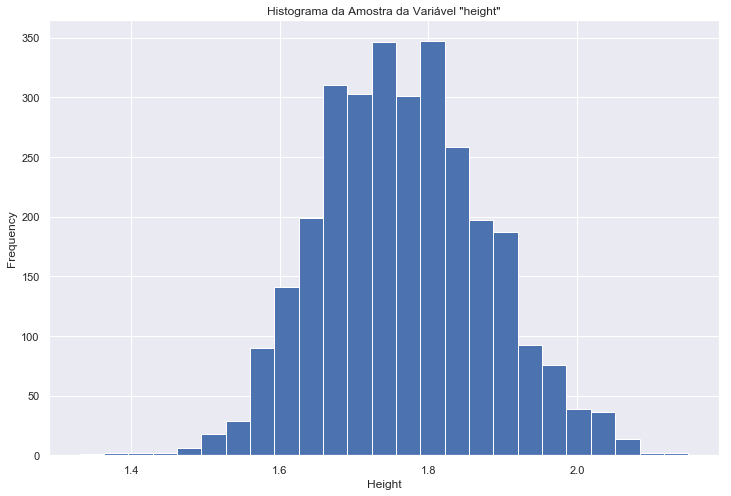

In [10]:
height_sample.plot(kind='hist',bins=25)
plt.title('Histograma da Amostra da Variável "height"')
plt.xlabel('Height')

**A forma do gráfico está em formado de sino característico de uma distribuição normal, isso não está condizente com o resultado do teste de normalidade que indica que a distribuição é não normal**

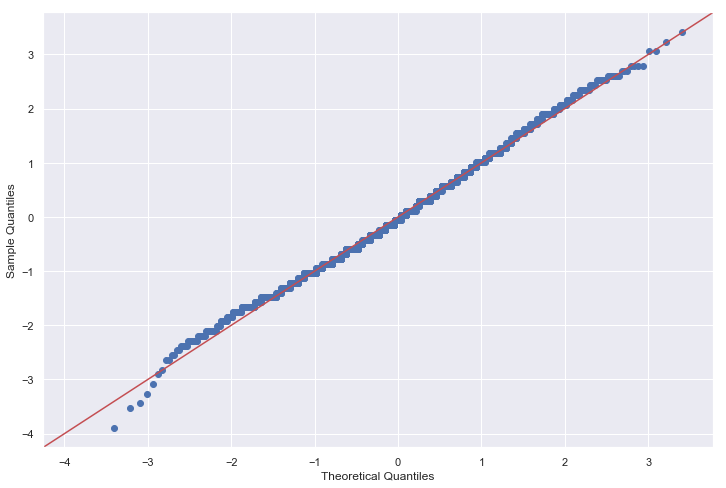

In [50]:
sm.qqplot(height_sample,loc=height_sample.mean(),scale=height_sample.std(),fit=True,line='45')
plt.show()

**De acordo com qqplot, a maiorias dos pontos estão sobre a linha que representa a representação perfeita de uma distribuição normal. Um ponto a ser observado são os desvios que ocorrem nas caudas, principalmente na cauda esquerda, isso infere que a distribuição está um pouco assimétrica explicando porque a hipótese nula foi rejeitada**

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [12]:
def q2():
    tats, p_value = sct.jarque_bera(height_sample)
    print(p_value)
    return bool(p_value >= 0.05)

In [13]:
q2()

0.001478366424594868


False

__Para refletir__:

* Esse resultado faz sentido?

**Sim, O teste de  Jarque-Bera, compara assimetria e a kurtosis da distribuição com a curva nomal, como vimos no qqplot que existe uma pequena assimetria esquerda, com isso não poderemos considerar que é normalmente distribuida de acordo com p-valor, ainda rejeitando a hipótese nula**

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [14]:
weight_sample = get_sample(athletes,'weight',3000)

In [15]:
def q3():
    stats, p_value = sct.normaltest(weight_sample)
    print(p_value)
    return bool(p_value > 0.05)

In [16]:
q3()

1.5898922918029537e-111


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

Text(0.5, 0, 'Weight')

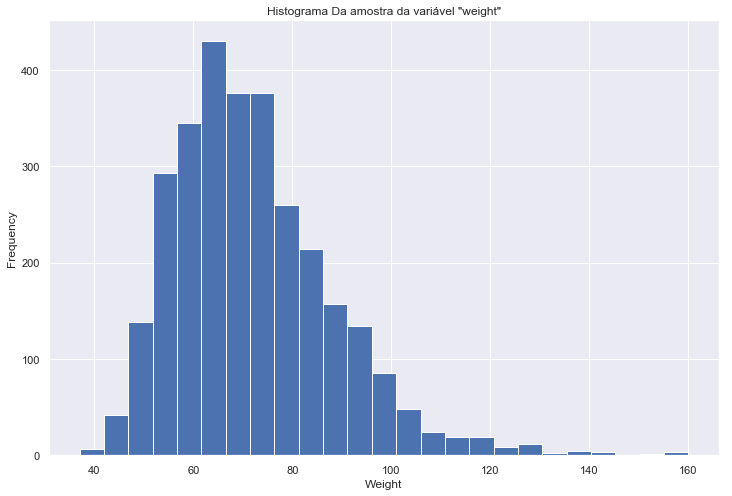

In [17]:
weight_sample.plot(kind='hist',bins=25)
plt.title('Histograma Da amostra da variável "weight"')
plt.xlabel('Weight')

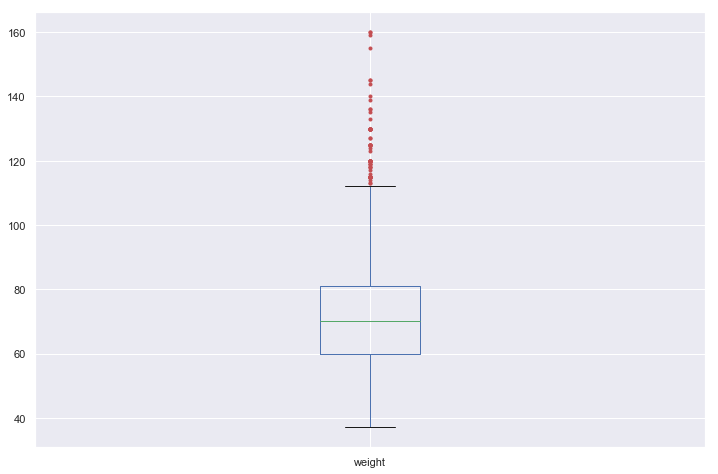

In [18]:
weight_sample.plot(kind='box', sym='r.')

**Fica claro pelo histograma e o boxplot que temos algums dados extremos do lado direito da distribuição, caracterizando como assimétrica direita. O p valor do teste de normalidade é inferior a 0.05 logo rejeitando a $H_0$**

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [19]:
weight_sample_log = np.log(weight_sample)

In [20]:
def q4():
    stats, p_value = sct.normaltest(weight_sample_log)
    print(p_value)
    return bool(p_value >= 0.05)

In [21]:
q4()

1.0705572101256944e-10


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

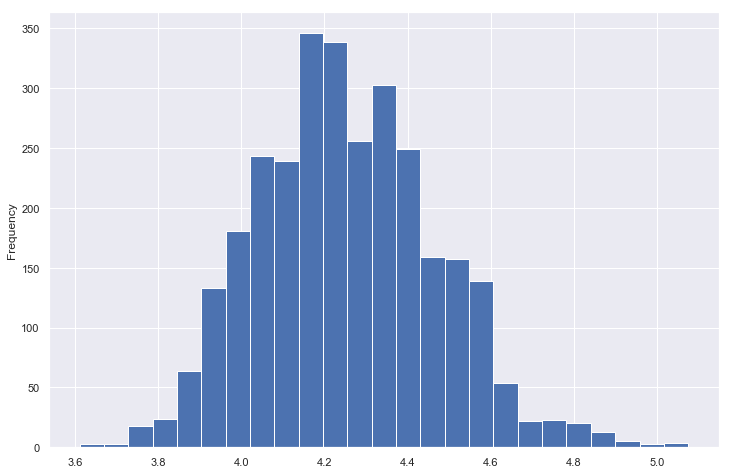

In [22]:
weight_sample_log.plot(kind='hist',bins=25)

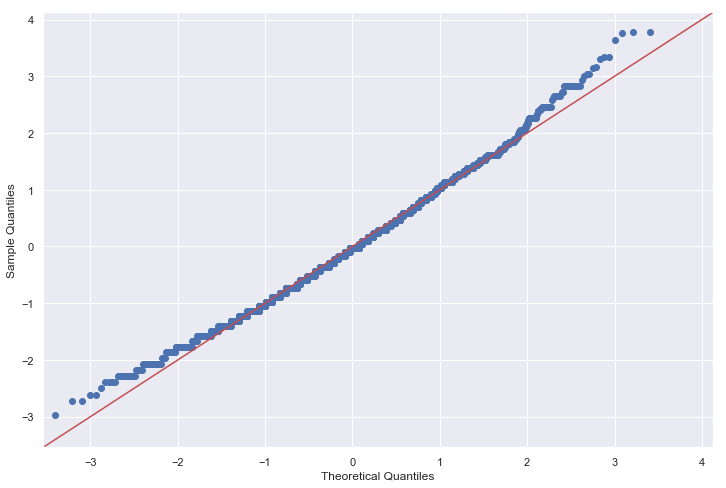

In [49]:
fig = sm.qqplot(weight_sample_log,loc=weight_sample_log.mean(),scale=weight_sample_log.std(),fit=True,line='45')
plt.show()

**Sim, a transformação logarítmica diminui a distância causada por pontos extremos, diminuindo visualmente as caudas longas**

**Sim, o qqplot monstra que as caudas estão muito fora da linha, descaracterizando a normalidade**

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [24]:
print(athletes[athletes.nationality=='BRA']['height'].dropna().var())
print(athletes[athletes.nationality=='USA']['height'].dropna().var())

0.013779906236178691
0.014151895923843572


In [25]:
bra, can, usa = [athletes[athletes['nationality'] == nation] for nation in ['BRA', 'CAN', 'USA']]

In [26]:
def q5():
    stats, p_value = sct.ttest_ind(bra['height'], usa['height'], equal_var=False, nan_policy = 'omit')
    print(p_value)
    return bool(p_value >= 0.05)

In [27]:
q5()

0.0013080041830140115


False

**Obervação pala o parâmetro `equal_var=False` devido as variâncias não serem iguais, dito isso, o teste realizado não foi t-student mas sim Welch’s t-test por ser mais confiável nesse caso**

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [28]:
def q6():
    stats, p_value = sct.ttest_ind(bra['height'], can['height'], equal_var=False, nan_policy = 'omit')
    print(p_value)
    return bool(p_value >= 0.05)

In [29]:
q6()

0.5230827295440921


True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [30]:
def q7():
    stats, p_value = sct.ttest_ind(usa['height'],can['height'], equal_var=False, nan_policy = 'omit')
    print(p_value)
    return float(np.round(p_value,8)) 

In [31]:
q7()

0.0004660129347389851


0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

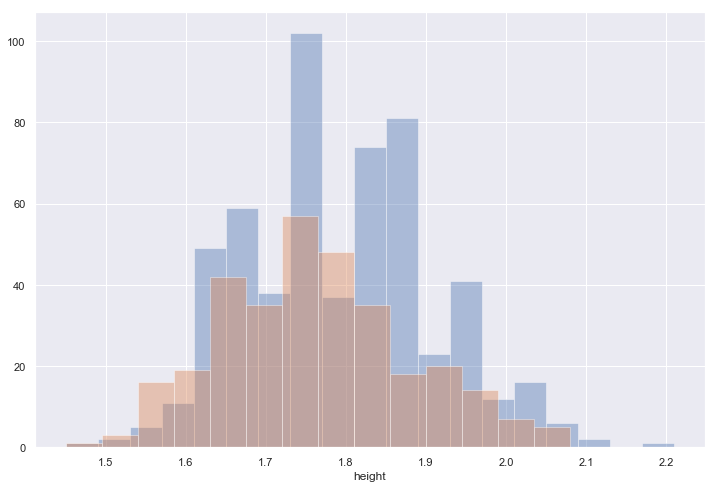

In [32]:
sns.distplot(usa['height'].dropna(),kde=False)
sns.distplot(can['height'].dropna(),kde=False)

In [33]:
print(len(usa['height']))
print(len(can['height']))

567
321


**Não muito. Apesar do teste de hipótese apresentar um valor-p menor que 5%, as médias e as distribuições são muito próximas porém segundo o valor-p (0.00046601), o ideal seria rejeitar hipótese nula. Provavelmente o motivo dessa diferença se deu pelo tamanho da amostra.**